In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('data/airplane-accident-severity.csv')

In [5]:
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Severity                 10000 non-null  object 
 1   Safety_Score             10000 non-null  float64
 2   Days_Since_Inspection    10000 non-null  int64  
 3   Total_Safety_Complaints  10000 non-null  int64  
 4   Control_Metric           10000 non-null  float64
 5   Turbulence_In_gforces    10000 non-null  float64
 6   Cabin_Temperature        10000 non-null  float64
 7   Accident_Type_Code       10000 non-null  int64  
 8   Max_Elevation            10000 non-null  float64
 9   Violations               10000 non-null  int64  
 10  Adverse_Weather_Metric   10000 non-null  float64
 11  Accident_ID              10000 non-null  int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In [7]:
df.isnull().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [8]:
df.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063,3139.750000
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467,6280.500000
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059,9391.500000
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378,12500.000000


In [9]:
df['Severity'].value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

In [10]:
col = ['Severity','Violations','Accident_Type_Code']

In [11]:
train = df[col]

In [12]:
train.astype('object').describe()

,Severity,Violations,Accident_Type_Code
count,10000,10000,10000
unique,4,6,7
top,Highly_Fatal_And_Damaging,2,4
freq,3049,3793,2057


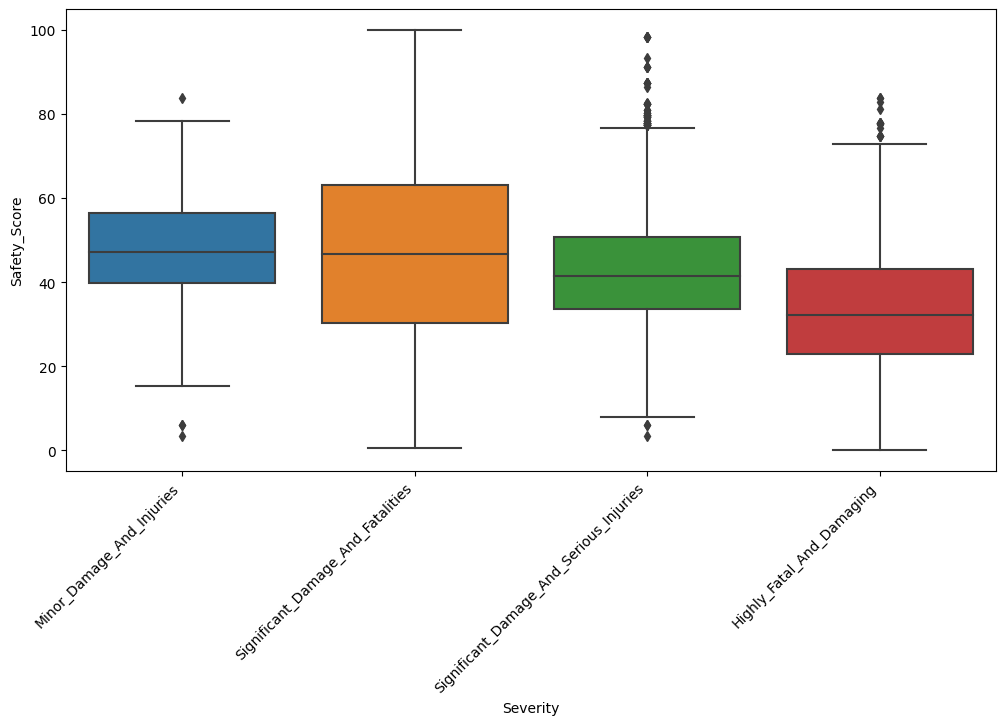

In [13]:
plt.figure(figsize=(12, 6))
chart = sns.boxplot(x = 'Severity', y = 'Safety_Score', data = df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [14]:
h = df.corr()

<ipython-input-14-d8d228e6d81c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  h = df.corr()


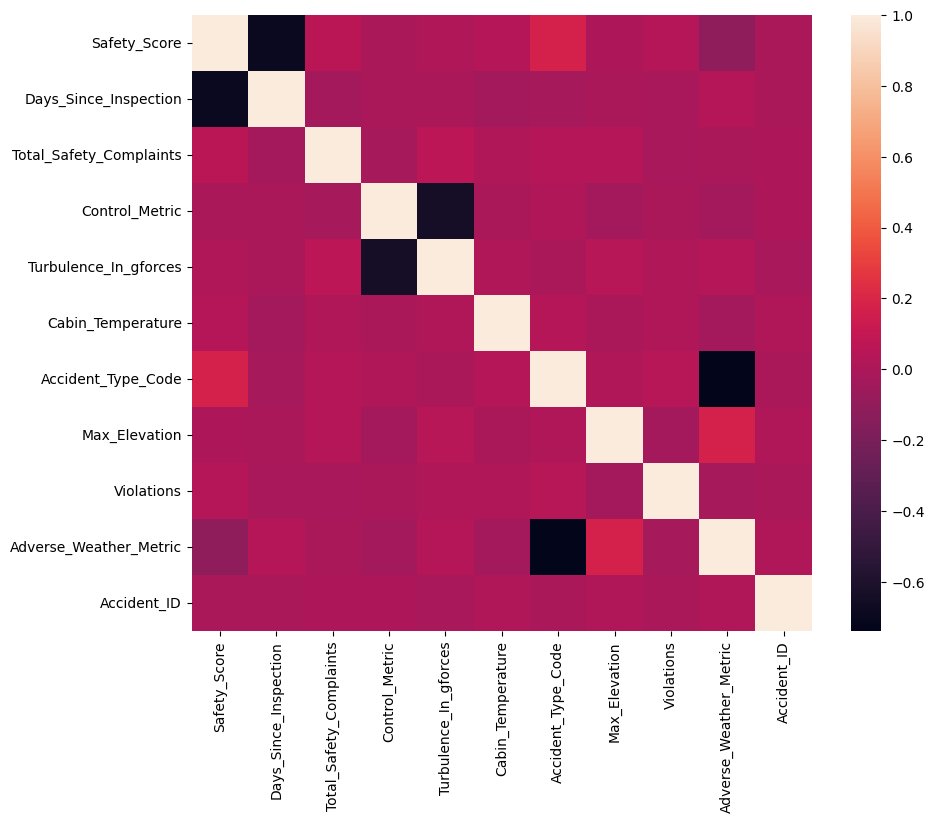

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(h)
plt.show()

# **With Safety Score**

As can be observed from the heatmap above, the maximum correlation is with the Safety_Score attribute. Hence, we will compare the difference in accuracy of prediction by different Classification Models once, using the Safety_Score and the second time, without it.

In [16]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()

In [17]:
df['Severity']= en.fit_transform(df['Severity'])

In [18]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(df.drop(['Severity'], axis=1), df['Severity'], test_size=0.15,random_state=101)

In [19]:
print(X1_train.shape)
print(X1_test.shape)

(8500, 11)
(1500, 11)


# **Decision Tree Classifier**
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [20]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy',
                               max_depth=10,
                               random_state=101)

In [21]:
dtc.fit(X1_train, y1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=101)

In [22]:
dtc.score(X1_train, y1_train) * 100

97.43529411764705

In [23]:
dtc.score(X1_test, y1_test) * 100

94.53333333333333

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
print(classification_report(y1_test, dtc.predict(X1_test)))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       467
           1       0.92      0.94      0.93       363
           2       0.95      0.94      0.94       247
           3       0.96      0.96      0.96       423

    accuracy                           0.95      1500
   macro avg       0.94      0.94      0.94      1500
weighted avg       0.95      0.95      0.95      1500



In [26]:
print(confusion_matrix(y1_test, dtc.predict(X1_test)))

[[439  14   6   8]
 [ 11 343   4   5]
 [  3   6 232   6]
 [  5  11   3 404]]


# **Random Forest Classifier**
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='entropy',
                             n_estimators=100,
                             max_depth=10,
                             random_state=101)

In [28]:
rfc.fit(X1_train,y1_train)

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=101)

In [29]:
rfc.score(X1_train, y1_train) * 100

96.36470588235294

In [30]:
rfc.score(X1_test, y1_test) * 100

89.2

In [31]:
print(classification_report(y1_test, rfc.predict(X1_test)))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       467
           1       0.80      0.89      0.85       363
           2       0.91      0.85      0.88       247
           3       0.91      0.91      0.91       423

    accuracy                           0.89      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.90      0.89      0.89      1500



In [32]:
print(confusion_matrix(y1_test, rfc.predict(X1_test)))

[[420  27   8  12]
 [  8 324  11  20]
 [  2  30 209   6]
 [ 14  22   2 385]]


# **XGBoost Classifier**
XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

In [33]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [34]:
xgb = XGBClassifier()
xgb.fit(X1_train, y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [35]:
y1_pred = xgb.predict(X1_test)
predictions = [round(value) for value in y1_pred]

In [36]:
accuracy = accuracy_score(y1_test, predictions)
print(accuracy * 100.0)

96.39999999999999


# **Gradient Boosting Classifier**
GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced.

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100,
                                 max_depth=10,
                                 learning_rate=0.2,
                                 random_state=101)

In [38]:
gbc.fit(X1_train, y1_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=10, random_state=101)

In [39]:
gbc.score(X1_train, y1_train) * 100

100.0

In [40]:
gbc.score(X1_test, y1_test) * 100

96.73333333333333

In [41]:
print(classification_report(y1_test, gbc.predict(X1_test)), confusion_matrix(y1_test, gbc.predict(X1_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       467
           1       0.96      0.97      0.96       363
           2       0.97      0.98      0.98       247
           3       0.97      0.96      0.97       423

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500
 [[451   7   4   5]
 [  6 352   2   3]
 [  0   1 243   3]
 [  9   7   2 405]]


#**Without Safety Score**

In [42]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()

In [43]:
df['Severity']= en.fit_transform(df['Severity'])

In [44]:
df1 = df.drop(['Safety_Score'], axis=1)
df1.head()

,Severity,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,1,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,1,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,2,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,3,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,2,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.drop(['Severity'], axis=1), df1['Severity'], test_size=0.15,random_state=101)

In [46]:
print(X_train.shape)
print(X_test.shape)

(8500, 10)
(1500, 10)


# **Decision Tree Classifier**

In [47]:
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier(criterion='entropy',
                               max_depth=10,
                               random_state=101)

In [48]:
dtc1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=101)

In [49]:
dtc1.score(X_train, y_train)* 100

74.08235294117647

In [50]:
dtc1.score(X_test, y_test)*100

62.6

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
print(classification_report(y_test, dtc1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       467
           1       0.56      0.55      0.55       363
           2       0.59      0.60      0.59       247
           3       0.71      0.71      0.71       423

    accuracy                           0.63      1500
   macro avg       0.62      0.62      0.62      1500
weighted avg       0.63      0.63      0.63      1500



In [53]:
print(confusion_matrix(y_test, dtc1.predict(X_test)))

[[291  78  37  61]
 [ 85 200  39  39]
 [ 38  37 147  25]
 [ 52  44  26 301]]


# **Random Forest Classifier**

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier(criterion='entropy',
                             n_estimators=400,
                             max_depth=20,
                             random_state=101)

In [55]:
rfc1.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=400,
                       random_state=101)

In [56]:
rfc1.score(X_train, y_train) * 100

99.94117647058823

In [57]:
rfc1.score(X_test, y_test) * 100

66.60000000000001

In [58]:
print(classification_report(y_test, rfc1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.63      0.66       467
           1       0.60      0.64      0.62       363
           2       0.62      0.64      0.63       247
           3       0.73      0.74      0.74       423

    accuracy                           0.67      1500
   macro avg       0.66      0.66      0.66      1500
weighted avg       0.67      0.67      0.67      1500



In [59]:
print(confusion_matrix(y_test, rfc1.predict(X_test)))

[[293  76  37  61]
 [ 56 233  38  36]
 [ 31  37 158  21]
 [ 46  40  22 315]]


# **XGBoost Classifier**

In [60]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [61]:
xgb1 = XGBClassifier(learning_rate =0.3,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 seed=27)
xgb1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, nthread=4, num_parallel_tree=None,
              objective='multi:softprob', ...)

In [62]:
y_pred = xgb1.predict(X_test)
predictions = [round(value) for value in y_pred]

In [63]:
accuracy = accuracy_score(y_test, predictions)
print((accuracy * 100.0))

68.26666666666667


# **Gradient Boosting Classifier**

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gbc1 = GradientBoostingClassifier()

In [65]:
gbc1.fit(X_train, y_train)

GradientBoostingClassifier()

In [66]:
gbc1.score(X_train, y_train) * 100

66.82352941176471

In [67]:
gbc1.score(X_test, y_test) * 100

64.8

In [68]:
print(classification_report(y_test, gbc1.predict(X_test)), confusion_matrix(y_test, gbc1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.60      0.64       467
           1       0.54      0.63      0.58       363
           2       0.61      0.63      0.62       247
           3       0.73      0.73      0.73       423

    accuracy                           0.65      1500
   macro avg       0.64      0.65      0.64      1500
weighted avg       0.65      0.65      0.65      1500
 [[279  99  31  58]
 [ 52 228  47  36]
 [ 26  47 155  19]
 [ 43  49  21 310]]


# **Comparison Table for all the Classifiers**

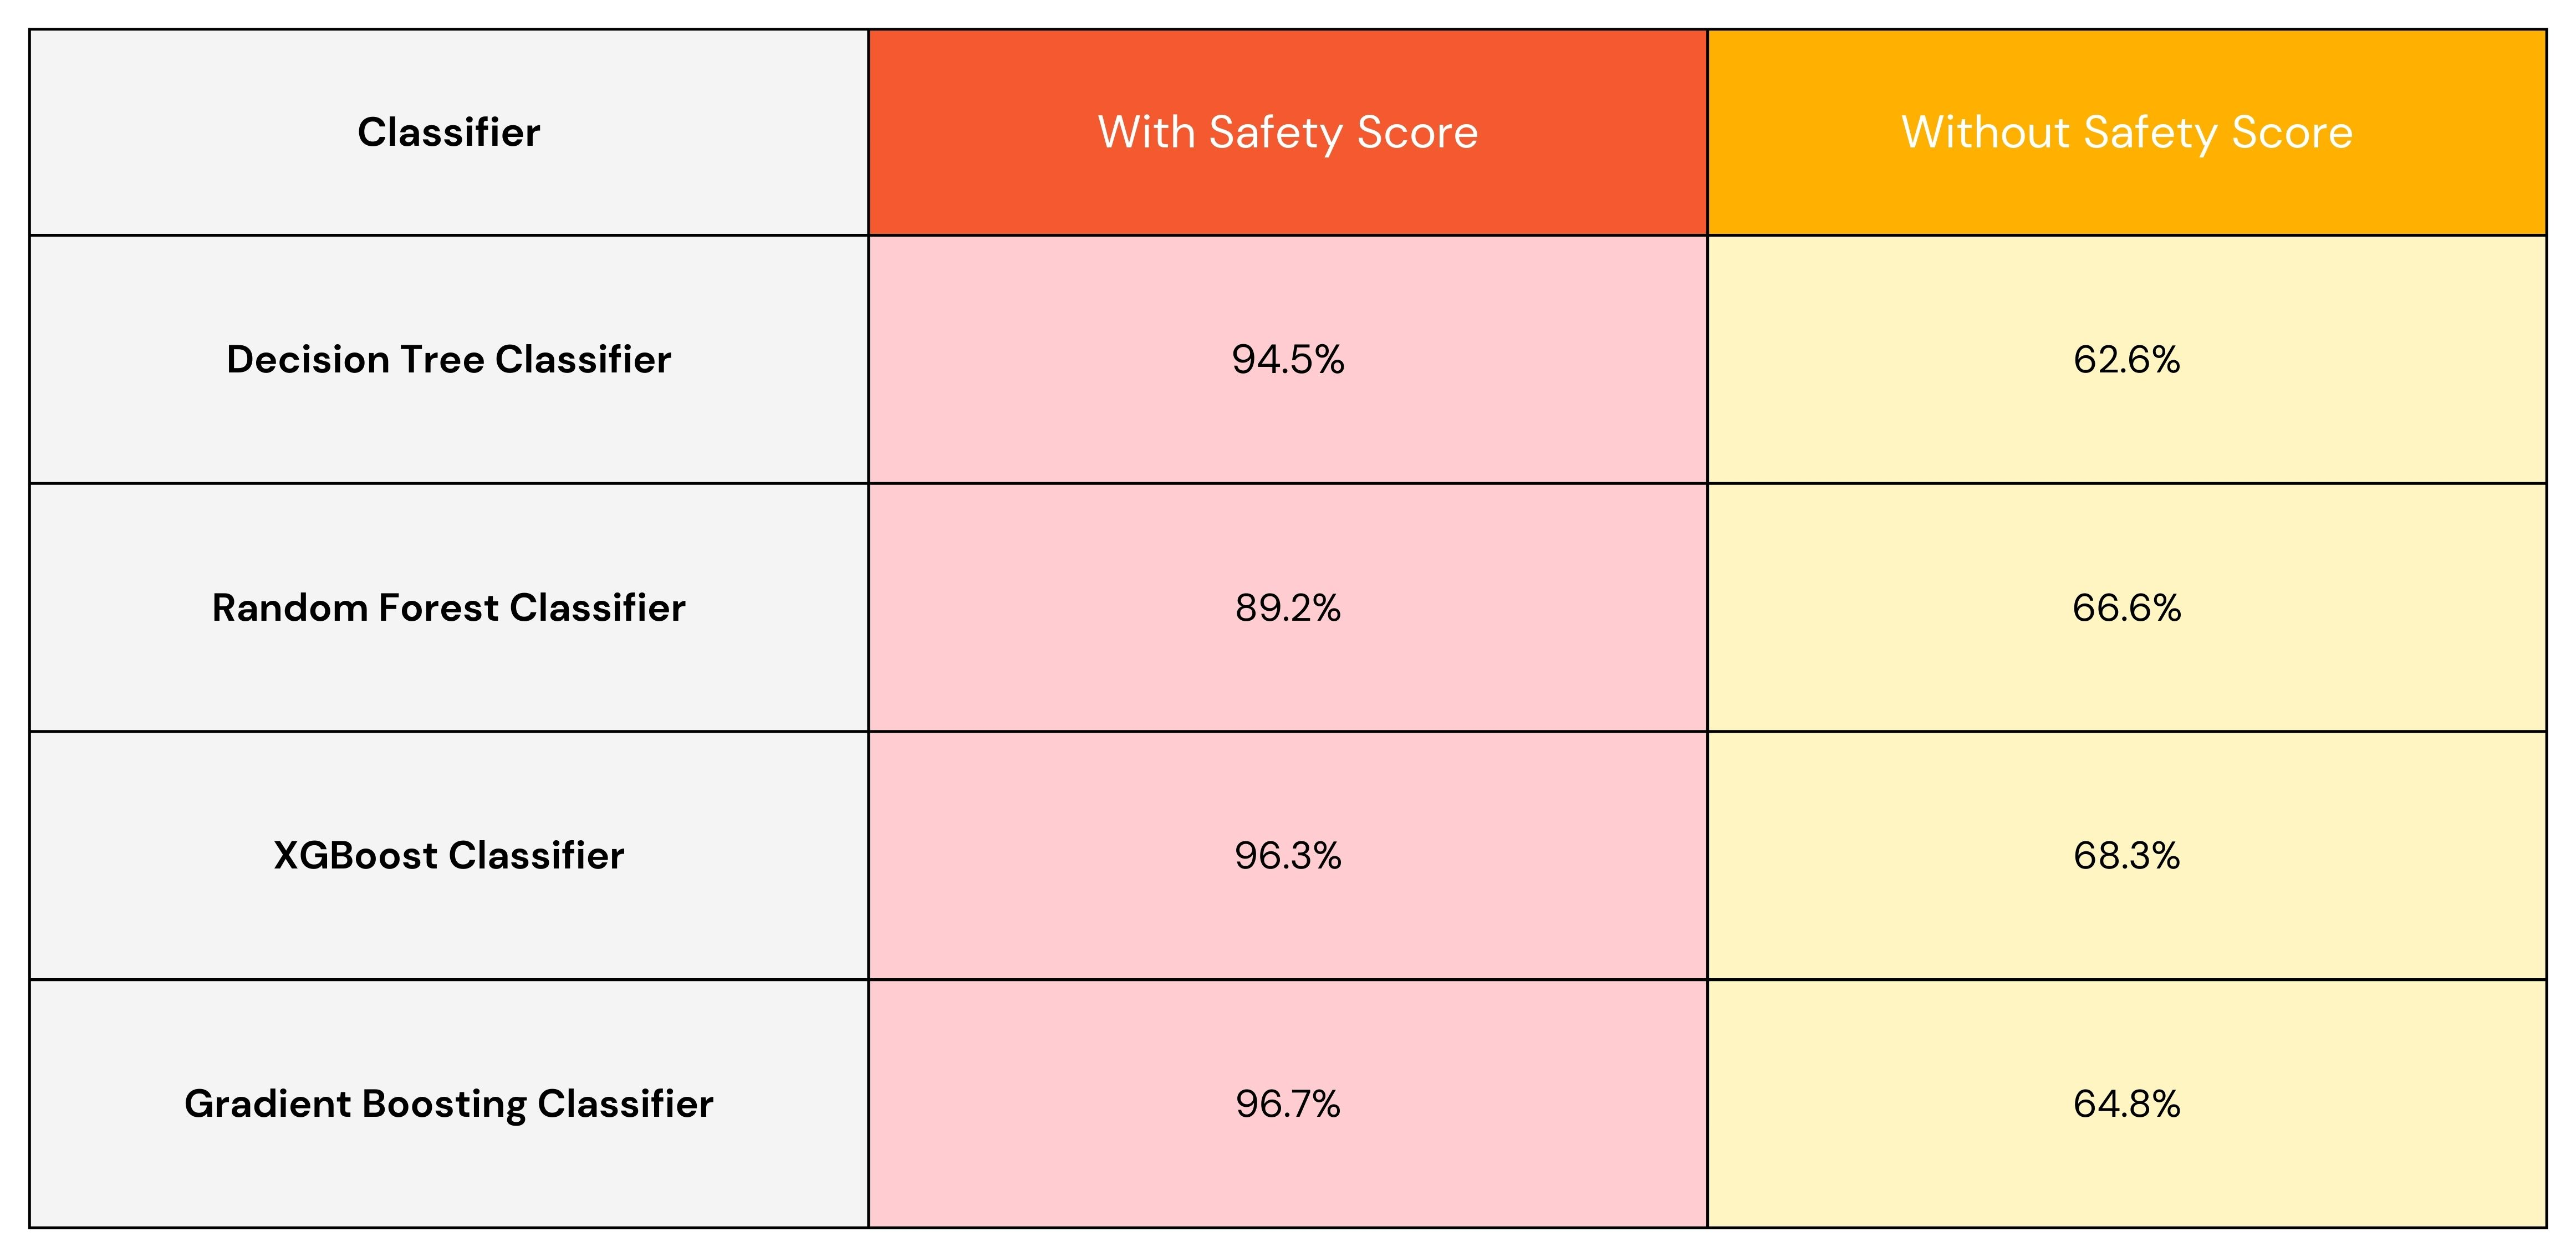